In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats  
import seaborn as seabornInstance 
%matplotlib inline
from sklearn import preprocessing

.....setup complete


# reading csv file

In [2]:
  
df=pd.read_csv("datascience_codes.csv")
print('shape of Dataframe is',df.shape)
df.head().T

shape of Dataframe is (10000, 14)


,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


It means there are no duplicate values

## Correlation – Heatmap

In [18]:
df.corr().T

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


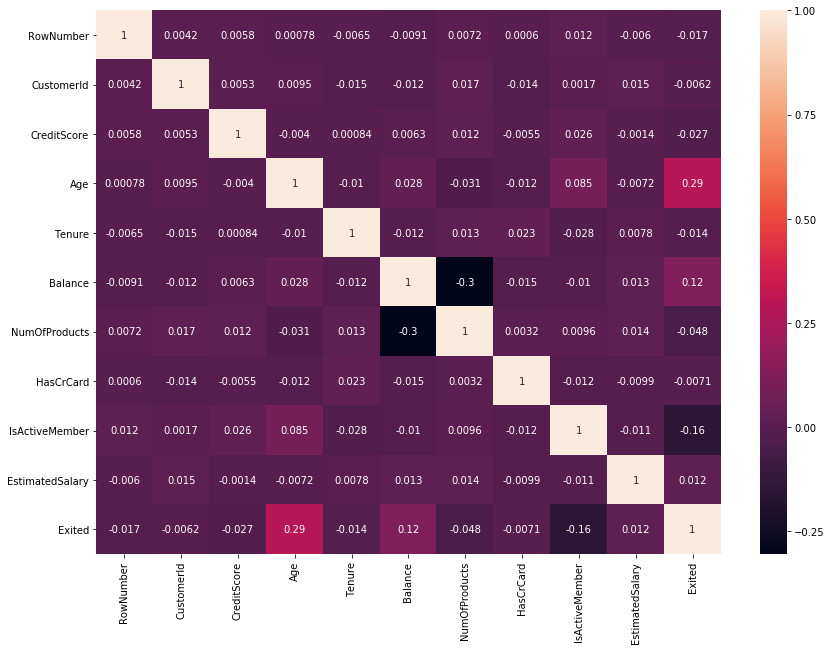

In [19]:
#correlation heat map

fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True,ax=ax)

## Pair plot 

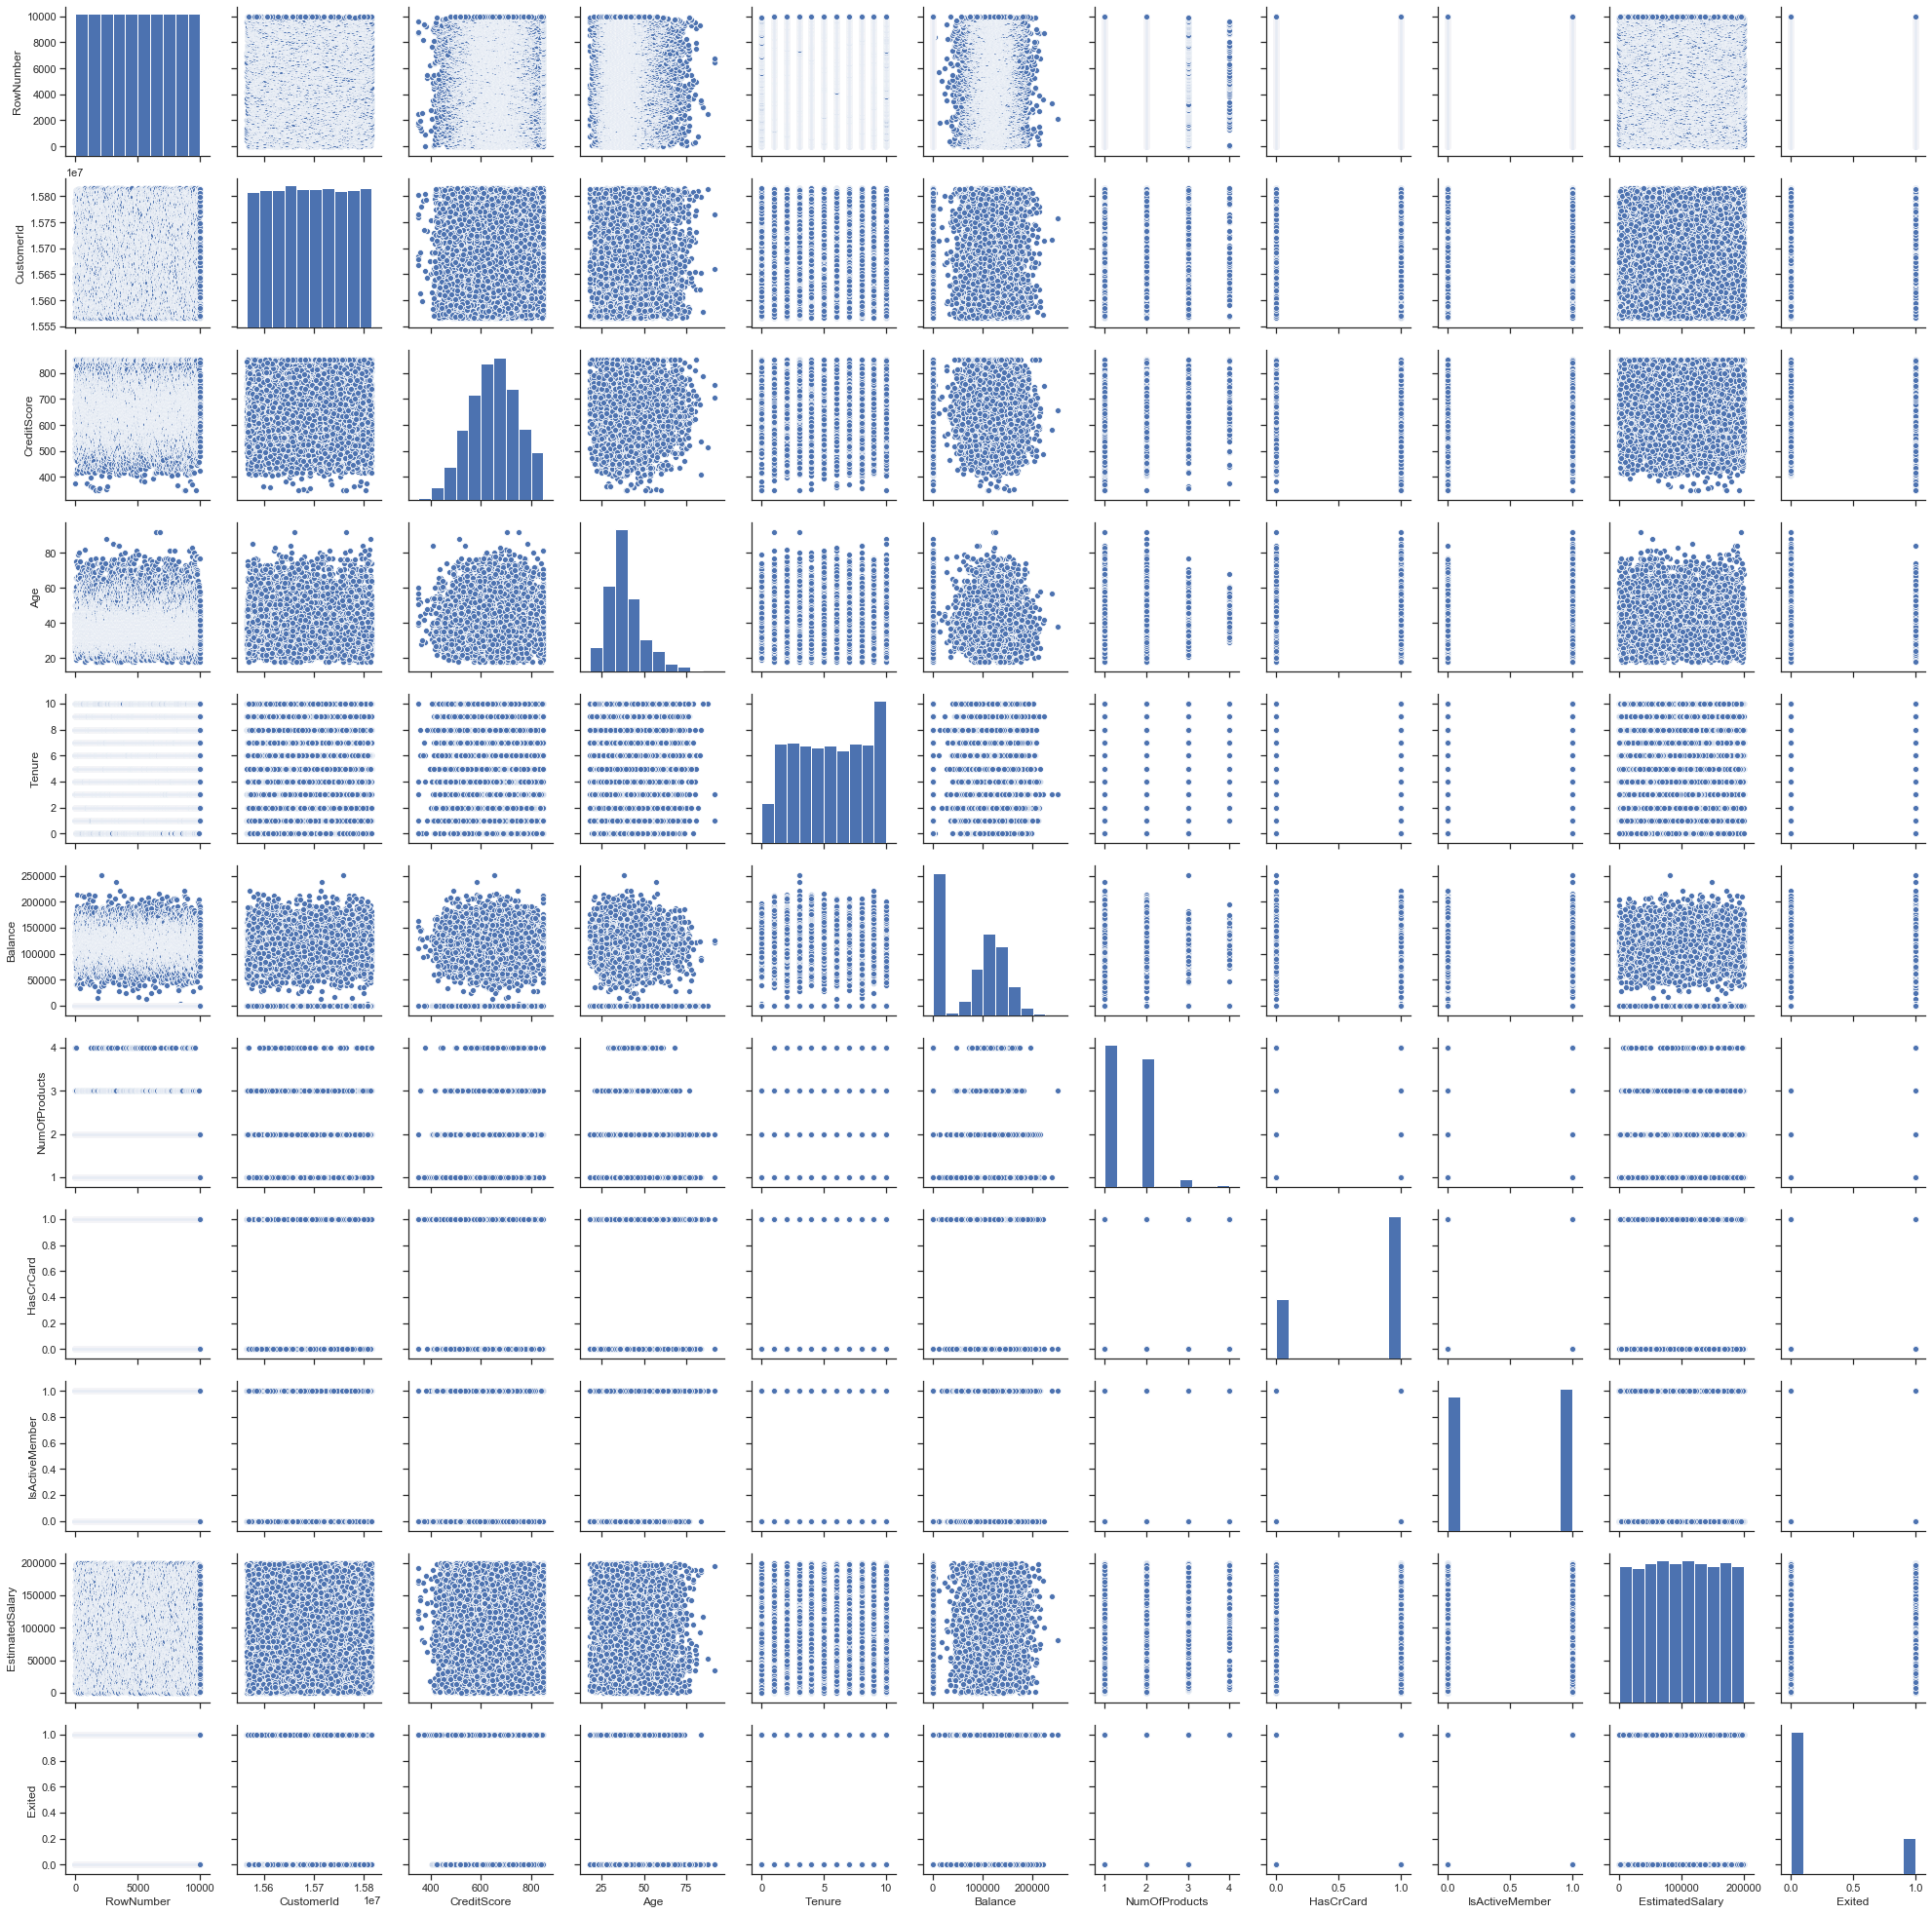

In [34]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

## Converting the Catogorical Data into Dummy Values

In [39]:
c_df= pd.get_dummies(df,columns=["Gender","Geography"])

In [40]:
c_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


## Train and Test Split

In [41]:
from sklearn.model_selection import train_test_split

X= c_df.loc[:,c_df.columns != 'Exited']
y= c_df.loc[:,c_df.columns == 'Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## Normalising the data using skelarn’s StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [45]:
s_rfc =rfc.score(X_test, y_test)

In [46]:
print('RF=',s_rfc)

RF= 0.8684


### Hyperparameter Tuning in Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

In [48]:
# checking for best parameter values of bootstrap, max_depth, max_features,min_samples_leaf,
# min_samples_split and n_estimators.


max_depth= [1,2,3,4,5,6,7,8,9,10,11,12,13]
n_estimators= [50,100,200,300,400,500]

param_grid = dict( max_depth=max_depth,  n_estimators=n_estimators)

#### Randomized Search

In [49]:
random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X, y)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.862800 using {'n_estimators': 300, 'max_depth': 11}
Execution time: 86.8751266002655 ms


#### Grid Search

In [50]:
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.864399 using {'max_depth': 13, 'n_estimators': 400}
Execution time: 543.2705609798431 ms


### New RF model with updated parametrs 

In [51]:
# n_estimators=400,max_depth=12
rfc = RandomForestClassifier(random_state=10,n_estimators=400,max_depth=12 )
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

Because of Random Search the parameter values are keep changing on every time the code execute.
So, the best values for parameter n_estimators=400 and max_depth=12

In [52]:
score1_rfc =rfc.score(X_test, y_test)
score1_rfc

0.8728

In [53]:
yhat = rfc.predict(X_test)
yhat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
yhat_prob = rfc.predict_proba(X_test)
yhat_prob

array([[0.69041378, 0.30958622],
       [0.79127822, 0.20872178],
       [0.8099829 , 0.1900171 ],
       ...,
       [0.71225755, 0.28774245],
       [0.81315645, 0.18684355],
       [0.93911208, 0.06088792]])

### Confusion matrix RF

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [56]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 256  253]
 [  65 1926]]


Confusion matrix, without normalization
[[ 256  253]
 [  65 1926]]


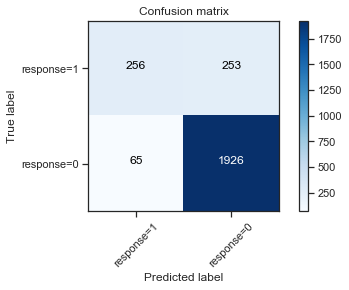

In [57]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['response=1','response=0'],normalize= False,  title='Confusion matrix')

 ### AUC, F1 Score, Precision, Recall and Accuracy RF

In [58]:
rf_score= (classification_report(y_test, yhat))
print(rf_score)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1991
           1       0.80      0.50      0.62       509

    accuracy                           0.87      2500
   macro avg       0.84      0.74      0.77      2500
weighted avg       0.87      0.87      0.86      2500



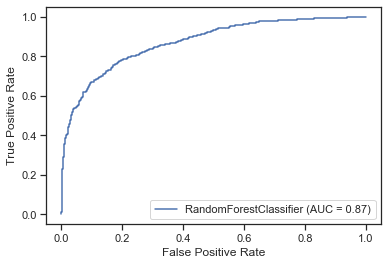

In [59]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(rfc,X_test, y_test)

###  Validating using k fold cross validation 


In [62]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection

In [63]:
# here k = 5
results=[]
kfold=model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(rfc,X_train,y_train,cv=kfold, scoring='accuracy')
results.append(cv_results)
print('Random Forest : ',cv_results.mean())

Random Forest :  0.8597333333333333
